## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random
def stdrandarray():
    return [(random.random())+1 for i in range(10000)]

def nprandarray(): 
        return (np.random.rand(10000) +1)

In [3]:
arr2 = (np.random.rand(10000) +1)

In [25]:
%%timeit
arr = [(random.random())+1 for i in range(10000)]

2.26 ms ± 706 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
%%timeit
arr2 = (np.random.rand(10000) +1)

194 µs ± 32.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [7]:
from math import sin, cos
def sumsincos(arr):
    return [sin(x)+cos(x) for x in arr]

def sumsincosnp(arr):
    return np.sin(arr)+np.cos(arr)

In [16]:
arr = stdrandarray()
print(sumsincosnp(arr)[:5])
print (sumsincos(arr)[:5])

[1.33637802 1.34347746 0.98583451 1.30179973 0.98337834]
[1.3363780198859851, 1.3434774557476392, 0.9858345135661579, 1.301799728967557, 0.9833783387906234]


In [17]:
%%timeit
sumsincosnp(nprandarray())

225 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [23]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [46]:
def cube_sum_np(x):
    return np.power(x,3).sum()

def almost_variance_np(x):
    return np.power(x-x.mean(), 4).mean()

In [30]:
arr = [(random.random())+1 for i in range(10000)]


UsageError: Line magic function `%%timeit` not found.


In [31]:
%%timeit
c1 = cube_sum(arr)

3.63 ms ± 941 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%%timeit
c2 = cube_sum_np(arr)

1.75 ms ± 661 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit
c3 = almost_variance(arr)

4.57 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%%timeit
c4 = almost_variance_np(arr2)

914 µs ± 141 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [21]:
tab= np.arange(1,11)
print(tab * tab.reshape(10,1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [49]:
points = np.random.rand(10,5)
# print(points.reshape(1,10,5),'\n')
# print(points.reshape(10,1,5),'\n')
print(np.square(points.reshape(10,1,5)- points.reshape(1,10,5)).sum(2))

[[0.         0.48580782 0.71287773 1.25907815 0.27861722 0.25809468
  1.50430643 1.09354155 0.57660056 2.40807296]
 [0.48580782 0.         0.65264715 1.97011936 0.29355543 0.65959995
  1.53952988 1.78855993 0.75861739 2.1484856 ]
 [0.71287773 0.65264715 0.         0.64759168 0.41478863 0.38398444
  0.48035471 1.16134461 0.21213404 0.8505507 ]
 [1.25907815 1.97011936 0.64759168 0.         1.40979581 0.55127449
  0.71784154 1.90551939 0.77790584 0.8269785 ]
 [0.27861722 0.29355543 0.41478863 1.40979581 0.         0.44768186
  1.26111207 0.91852567 0.68336035 2.15086401]
 [0.25809468 0.65959995 0.38398444 0.55127449 0.44768186 0.
  0.61240814 1.00363455 0.3249776  1.18595842]
 [1.50430643 1.53952988 0.48035471 0.71784154 1.26111207 0.61240814
  0.         1.15263816 0.58436794 0.29594808]
 [1.09354155 1.78855993 1.16134461 1.90551939 0.91852567 1.00363455
  1.15263816 0.         1.15992298 2.57842098]
 [0.57660056 0.75861739 0.21213404 0.77790584 0.68336035 0.3249776
  0.58436794 1.159922

In [ ]:
print(np.linalg.norm(a-b))

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [56]:
def whiten_np(x):
    return((x-np.mean(x,axis=0))/np.std(x,axis=0))

array= np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])
print(whiten_np(array))
# print(np.std(whiten_np(array),axis=0))
# print(np.mean(whiten_np(array),axis=0))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [56]:
def closest(x,A):
    return A[np.argmin(np.abs(A-x))]

closest(1.5, np.array([1,-4,3]))

1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [62]:
def poly(a, x):
    return np.power(np.repeat(a, len(x)), np.arange(0,len(x))).sum()

print(poly(3,[1,1,1]))   

13


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

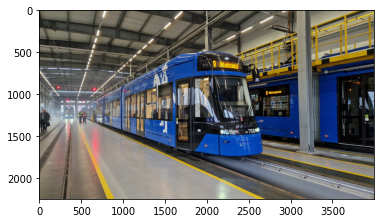

In [76]:
img = mpimg.imread('images/stl2.jpg')
plt.imshow(img)

### Zad 9.

Napisz funkcje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

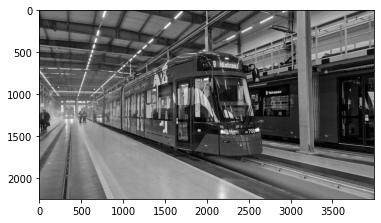

In [81]:
def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.2126)
        G = (G *.7152)
        B = (B *.0722)

        Avg = (R+G+B)
        grayImage = img.copy()

        for i in range(3):
           grayImage[:,:,i] = Avg
           
        return grayImage       
  
grayImage = rgb_to_gray(img)  
plt.imshow(grayImage)
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [82]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
lambdas = np.linspace(0, 1, 10)
lambdas_matrix = np.repeat(lambdas[:, np.newaxis], x1.shape[0], axis=1)
interpolation = lambdas_matrix * x1 + (1 - lambdas_matrix) * x2
print(interpolation)

[[4.         5.         6.        ]
 [3.66666667 4.66666667 5.66666667]
 [3.33333333 4.33333333 5.33333333]
 [3.         4.         5.        ]
 [2.66666667 3.66666667 4.66666667]
 [2.33333333 3.33333333 4.33333333]
 [2.         3.         4.        ]
 [1.66666667 2.66666667 3.66666667]
 [1.33333333 2.33333333 3.33333333]
 [1.         2.         3.        ]]
